# Study 1: Analysis Anonymized

First of all, all necessary libraries will be imported.

In [1]:
import csv
import json
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import scipy
import gensim
from gensim import corpora, models

import string
import nltk
import pandas as pd
import numpy as np
from scipy import stats
import sys

import csv
from collections import Counter
import statsmodels.formula.api as sm

tokenizer = RegexpTokenizer(r'\w+')
my_stop = stopwords.words('dutch')
stemmer = SnowballStemmer('dutch')
from nltk.tokenize import word_tokenize
import re

from pattern.nl import suggest
import itertools

import pickle
import plotly.express as px

from scipy.stats import kendalltau, pearsonr, spearmanr

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

Lets import the different kind of diet-related dictionaries we created beforehand.

In [2]:

#with open("Input/Dictionaries/eten_en_drinken_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    #eten_en_drinken3 = json.load(fp)
    
with open("Input/Dictionaries/foods_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    foods2 = json.load(fp)
    
with open("Input/Dictionaries/drinks_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    drinks2 = json.load(fp)
    
with open("Input/Dictionaries/diet_related_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    diet_related2 = json.load(fp)
    
with open("Input/Dictionaries/supermarkets_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    supermarkets2 = json.load(fp)
    
with open("Input/Dictionaries/internet_slang_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    internet_slang2 = json.load(fp)
    
with open("Input/Dictionaries/restaurants_cafes_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    restaurants_cafes2 = json.load(fp)
    
with open("Input/Dictionaries/meals_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    meals2 = json.load(fp)

with open("Input/Dictionaries/dutch_meals_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    dutch_meals2 = json.load(fp)
    
with open("Input/Dictionaries/food_brands_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    food_brands2 = json.load(fp)
    
with open("Input/Dictionaries/diets_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    diets2 = json.load(fp)

with open("Input/Dictionaries/embeddings_stem.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    embeddings2 = json.load(fp)
    
with open("Input/Nutriscores/nutriscores.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    nutriscores = json.load(fp)

#healthy = pd.read_csv("Input/Nutriscores/healthy.csv")

#unhealthy = pd.read_csv("Input/Nutriscores/unhealthy.csv")
    
#with open("Input/Nutriscores/nutriscores_healthy.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    #nutriscores_healthy = json.load(fp)
    
#with open("Input/Nutriscores/nutriscores_unhealthy.json", "r", encoding = "utf-8", errors = "ignore") as fp:
    #nutriscores_unhealthy = json.load(fp)
    

Lets also import messages that contain at least one word fro the respective dictionaries. (Note: We do not have consent top share the original text messages. In case you are interested in obtaining insight into the exact dataset, please contact the corresponding author.) Instead we give insight into a anonymized dataset for getting to know the data structure as oftent as possible.

In [4]:
food_buzz_anon = pd.read_csv("Input/Text/food_buzz_anon.csv")
#food_buzz = pd.read_pickle("Input/Text/food_buzz.pkl")
#drink_buzz = pd.read_pickle("Input/Text/drink_buzz.pkl")
#restaurant_buzz = pd.read_pickle("Input/Text/restaurant_buzz.pkl")
#supermarket_buzz = pd.read_pickle("Input/Text/supermarket_buzz.pkl")
#related_buzz = pd.read_pickle("Input/Text/related_buzz.pkl")
#slang_buzz = pd.read_pickle("Input/Text/slang_buzz.pkl")
#brand_buzz = pd.read_pickle("Input/Text/brand_buzz.pkl")
#diet_buzz = pd.read_pickle("Input/Text/diet_buzz.pkl")
#meal_buzz = pd.read_pickle("Input/Text/meal_buzz.pkl")
#dmeal_buzz = pd.read_pickle("Input/Text/dmeal_buzz.pkl")
#eat_buzz = pd.read_pickle("Input/Text/eat_buzz.pkl")
#unique_buzz = pd.read_pickle("Input/Text/unique_buzz.pkl")

Some columns need to be renamed, so that they fit the pandas format.

In [7]:
food_buzz = food_buzz_anon.rename(columns={'Media_0.0': 'Media_0', 'Media_1.0': "Media_1", "Media_2.0": "Media_2"})

# Frenquency of diet-related food communication

Lets have a look how the anonymized dataset without the Texts looks at this moment:

In [8]:
food_buzz_anon

,Unnamed: 0,Unnamed: 0.1,Sender,Child,UMID,Recipient,Type,Likes,Gender,Age,...,related,slang,brands,diet,meals,Dmeals,Media_0.0,Media_1.0,Media_2.0,words_no
0,76,76,3410302338,2338.0,32022,NaN,group,2,0.0,10.0,...,0,0,0,0,0,0,1,0,0,3
1,82,82,3410302338,2338.0,32092,NaN,group,1,0.0,10.0,...,0,0,0,0,0,0,1,0,0,3
2,163,163,3410302341,2341.0,31332,NaN,group,2,1.0,11.0,...,1,0,0,0,0,0,0,0,1,1
3,238,238,3410302342,2342.0,31681,NaN,group,1,1.0,10.0,...,1,0,0,0,0,0,1,0,0,1
4,242,242,3410302342,2342.0,31691,NaN,group,1,1.0,10.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,431642,431642,5526305221,5221.0,166156,5.526305e+09,my,0,1.0,10.0,...,0,0,0,0,0,0,1,0,0,1
2134,431723,431723,5526305226,5226.0,166069,NaN,group,0,1.0,11.0,...,0,0,0,0,0,0,1,0,0,1
2135,431725,431725,5526305226,5226.0,166074,5.526305e+09,my,0,1.0,11.0,...,0,0,0,0,0,0,1,0,0,2
2136,431746,431746,5526305226,5226.0,167369,NaN,group,1,1.0,11.0,...,1,0,0,0,0,0,0,0,1,1


# How does youth communicate about food?

But which food words occur the most in the data? Lets calculate this for each dictionary individually:

In [9]:
tokens = []
#for sentences in food_buzz.stem:
    #for words in sentences:
        #tokens.append(words)
        
#c = Counter(tokens)


#We look at each diet-related dictionary seperately:

#unique_words = set(eten_en_drinken3)
#d = {k:w for k, w in c.items() if k in unique_words}

#unique_words_food = set(foods2)
#e = {k:w for k, w in c.items() if k in unique_words_food}


#unique_words_drinks = set(drinks2)
#f = {k:w for k, w in c.items() if k in unique_words_drinks}

#unique_words_diet_related = set(diet_related2)
#g = {k:w for k, w in c.items() if k in unique_words_diet_related}


#unique_words_supermarkets = set(supermarkets2)
#h = {k:w for k, w in c.items() if k in unique_words_supermarkets}


#unique_words_dutch_meals = set(dutch_meals2)
#i = {k:w for k, w in c.items() if k in unique_words_dutch_meals}


#unique_words_meals = set(meals2)
#j = {k:w for k, w in c.items() if k in unique_words_meals}


#unique_words_restaurants_cafes = set(restaurants_cafes2)
#k = {k:w for k, w in c.items() if k in unique_words_restaurants_cafes}


#unique_words_internet_slang = set(internet_slang2)
#l = {k:w for k, w in c.items() if k in unique_words_internet_slang}



#unique_words_diets = set(diets2)
#m = {k:w for k, w in c.items() if k in unique_words_diets}


#unique_words_food_brands = set(food_brands2)
#n = {k:w for k, w in c.items() if k in unique_words_food_brands}

#unique_words_popular = set(food_brands2)
#n = {k:w for k, w in c.items() if k in unique_words_food_brands}


Lets sort which word occur the most in the dataset: (exchanging the letter before items will give the results for each dictionary respectively.

In [10]:
#dict(sorted(d.items(), key=lambda item: item[1]))

How would this look like visually? For this analysis we are considering the most often occuring words within the dataset.

In [11]:
#popular = food_buzz[food_buzz["Likes"] >= 1]
#unpopular = food_buzz[food_buzz["Likes"] < 1]

In [12]:
#popular2 = []

#for topic in popular.stem:
    #for word in topic:
       #popular2.append(word)
        
#unpopular2 = []

#for topic in unpopular.stem:
    #for word in topic:
        #unpopular2.append(word)

In [13]:
#tokens_popularity = []
#for sentences in popular.stem:
    #for words in sentences:
        #tokens_popularity.append(words)
        
#tokens_unpopularity = []
#for sentences in unpopular.stem:
    #for words in sentences:
        #tokens_unpopularity.append(words)

#ff = Counter(tokens_popularity)
#gg = Counter(tokens_unpopularity)

#unique_words_popular = set(popular2)
#z = {k:w for k, w in ff.items() if k in popular2}

#unique_words_unpopular = set(popular2)
#zz = {k:w for k, w in gg.items() if k in unpopular2}

In [14]:
#wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(z)
##plt.imshow(wc)

This is the resulting word-cloud of the most frequently mentioned diet-related items:

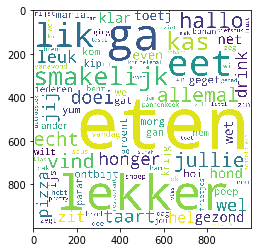

In [15]:
import imageio as iio
img = iio.imread("Output/wordcloud.png")
plt.imshow(img)

# Healthiness of the found words

Now we are going to have a look how healthy the foods are which youth talk about. For this we match the words found in youth text with the collected nutriscores of the items:

In [95]:
def get_scores2(text):
    scores = []
    for word in text:
        if word in nutriscores.keys():
            scores.append(nutriscores[word])
        else:
            continue
    return scores

#food_buzz["nutriscores"] = food_buzz['words'].apply(get_scores_2)

Lets label messages without nutriscores with an "NA", and calculate the mean nutriscore within a message (this was the average of all mentioned dietary items)

In [17]:
#food_buzz["nutriscores"] = food_buzz["nutriscores"].apply(lambda x: [y for y in x if y != 'NA'])

#food_buzz["nutriscore_mean"] = food_buzz["nutriscores"].apply(np.mean)
#food_mean = list(food_buzz["nutriscore_mean"])

For demonstration purposes we will load a list of all found nutriscores without the messages:

In [73]:
nutriscore_mean = pd.read_csv('Output/nutriscore-mean.csv')
nutriscore_mean = nutriscore_mean["nutriscore_mean"]

In [74]:
print("The mean nutriscore value is", nutriscore_mean.mean(), "(SD =", nutriscore_mean.std(), ")")

The mean nutriscore value is 3.029829106945976 (SD = 1.1283525380659851 )


For even greater insight lets visualize the nutriscore values that we received.

Text(0, 0.5, 'Message Frequency')

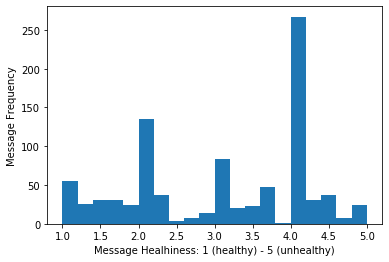

In [76]:
plt.hist(nutriscore_mean, bins=20)
plt.xlabel('Message Healhiness: 1 (healthy) - 5 (unhealthy)')
plt.ylabel('Message Frequency')


Although these insights are nice, we paid tribute to the facts, that some nutriscore values had a higher chance of being found in the data, since they also appeared more often in our diet-related dictionary. Therefore we aimed to correct for this and represent nutri-score frequencies, relative to the frequencies in the used dictionary. 

For this we first calculate the nutriscores in our used dictionary. Also we recode the nutriscore values to a more easily interpretable format, such that negativ values represent unhealthy nutriscores (E-F), 0 represent neutral nutriscore (C) and positive values represent a healthy nutriscores (A-B)

In [271]:
nutri = nutriscores.values()

nutri = list(nutri)
nutri = [num for num in nutri if isinstance(num, (int,float))]

In [266]:
mean_nutti = Counter(nutri)
df2 = pd.DataFrame.from_dict(mean_nutti, orient='index').reset_index()
df2 = df2.dropna()
df2 = df2.rename(columns={"index": "nutriscores", 0: "frequency"})
df2["nutriscores"] = (df2["nutriscores"] - 3 ) * -1
df2['% dic'] = ((df2['frequency'] / df2['frequency'].sum())*100).round(2).astype(float)
print(df2.sort_values(by = "nutriscores"))


    nutriscores  frequency  % dic
23         -2.0         10   5.13
9          -1.8          5   2.56
0          -1.6          2   1.03
16         -1.5          1   0.51
21         -1.4          5   2.56
8          -1.2         10   5.13
3          -1.0         35  17.95
12         -0.8          8   4.10
25         -0.6          3   1.54
24         -0.5          3   1.54
18         -0.4          1   0.51
10         -0.3          2   1.03
2          -0.2          8   4.10
5          -0.0          8   4.10
19          0.2          3   1.54
26          0.4          1   0.51
13          0.5          1   0.51
20          0.6          5   2.56
14          0.7          1   0.51
6           0.8          8   4.10
7           1.0         25  12.82
22          1.2          6   3.08
17          1.4          5   2.56
15          1.5          3   1.54
1           1.6          6   3.08
11          1.8          7   3.59
4           2.0         23  11.79


To make scores of the message and dictionary align we round some numbers to the nearest decimal.

In [267]:
ff = nutriscore_mean

for score in ff:
    if score == 1.1:
        ff = ff.replace(score, 1.0)
        
    if score == 1.3:
        ff = ff.replace(score, 1.4)
    if score == 1.7:
        ff = ff.replace(score, 1.8)
    if score == 1.9:
        ff = ff.replace(score, 2.0) 
    if score == 2.1:
        ff = ff.replace(score, 2.0)
    if score == 2.7:
        ff = ff.replace(score, 2.8)
    if score == 2.9:
        ff = ff.replace(score, 3.0)
    if score == 3.1:
        ff = ff.replace(score, 3.0)
    if score == 3.7:
        ff = ff.replace(score, 3.8)
    if score == 3.9:
        ff = ff.replace(score, 4.0)
    if score == 4.1:
        ff = ff.replace(score, 4.0)
    if score == 4.3:
        ff = ff.replace(score, 4.4)
    if score == 4.7:
        ff = ff.replace(score, 4.8)
    if score == 4.9:
        ff = ff.replace(score, 5.0) 


Next we calculate the relative frequency of the nutriscores in the messages and again repeat the re-coding of nutriscore values-

In [268]:
counter = Counter(ff)
df3 = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df3 = df3.dropna()
df3 = df3.rename(columns={"index": "nutriscores", 0: "frequency"})
df3["nutriscores"] = (df3["nutriscores"] - 3 ) * -1
df3['% full'] = ((df3['frequency'] / df3['frequency'].sum())*100).round(2).astype(float)
print(df3.sort_values(by = "nutriscores"))

      nutriscores  frequency  % full
44      -2.000000         24    2.65
217     -1.800000          5    0.55
1131    -1.600000          2    0.22
394     -1.500000          1    0.11
3       -1.400000         37    4.08
140     -1.200000         30    3.31
193     -1.133333          1    0.11
5       -1.000000        267   29.44
37      -0.800000         24    2.65
511     -0.666667          1    0.11
194     -0.600000         23    2.54
34      -0.500000         23    2.54
0       -0.400000          2    0.22
1233    -0.333333          1    0.11
112     -0.300000          2    0.22
9       -0.200000         16    1.76
393     -0.180000          1    0.11
348     -0.050000          1    0.11
11      -0.000000         83    9.15
630      0.125000          1    0.11
795      0.133333          1    0.11
241      0.150000          3    0.33
431      0.200000          9    0.99
631      0.250000          1    0.11
10       0.400000          6    0.66
12       0.500000          3    0.33
3

And we merge them with the relative frequencies found in the dictionary and in the messages:

In [269]:
df_complete = df3.merge(df2, on = "nutriscores")
df_complete["% difference"] = df_complete["% full"] - df_complete["% dic"]
df_complete = df_complete.sort_values(by = "nutriscores")
df_complete

,nutriscores,frequency_x,% full,frequency_y,% dic,% difference
13,-2.0,24,2.65,10,5.13,-2.48
21,-1.8,5,0.55,5,2.56,-2.01
26,-1.6,2,0.22,2,1.03,-0.81
24,-1.5,1,0.11,1,0.51,-0.40
1,-1.4,37,4.08,5,2.56,1.52
19,-1.2,30,3.31,10,5.13,-1.82
2,-1.0,267,29.44,35,17.95,11.49
11,-0.8,24,2.65,8,4.10,-1.45
20,-0.6,23,2.54,3,1.54,1.00
10,-0.5,23,2.54,3,1.54,1.00


Not finally we can plot the nutriscore values, relative to their expected frequencies based on the dictionary:

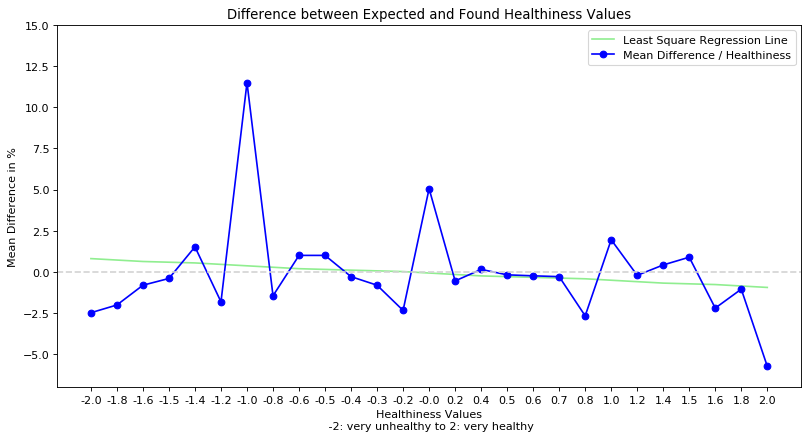

In [270]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import interpolate

figure(figsize=(12, 6), dpi=80)
x = df_complete["nutriscores"]

# create an index for each tick position
xi = list(range(len(x)))
y = df_complete["% difference"]
plt.ylim(-7,15.0)
# plot the index for the x-values
m, b = np.polyfit(x, y, 1)
plt.plot(xi, m*x + b, color = "lightgreen", label = "Least Square Regression Line")

plt.plot(xi, y, marker='o', linestyle='-', color='b', label='Mean Difference / Healthiness') 
plt.axhline(y=0, color='lightgrey', linestyle='--')
plt.xticks(xi, round(x, 1))
plt.xlabel('Healthiness Values\n -2: very unhealthy to 2: very healthy')
plt.ylabel('Mean Difference in %') 

poly = np.polyfit(x, y, 3)
poly_y = np.poly1d(poly)(x)
#plt.plot(xi,poly_y, color = "orange", label = "Polygon Frequency")


x_new = np.linspace(0, 27, 15)
a_BSpline = interpolate.make_interp_spline(xi, y)
y_new = a_BSpline(x_new)

#plt.plot(x_new, y_new, label='Mean Difference / Healthiness')
plt.title('Difference between Expected and Found Healthiness Values')
plt.legend()
plt.show()

Next we checked if the healthiness of a message was able to predict the number of like that a message received:

In [312]:
#regression = sm.ols(formula="Likes ~ nutriscore_mean + Age + Gender", data=food_buzz).fit()
#print(regression.summary())

The results did not show any significant results.

# Sentiment

Okay, now lets look if unhealthy / healthy food communication differs in other dimensions. e.g. in terms of their sentiment expressed. The pattern library captures both polarity (pos vs neg.) as well as the subjectivity of the message.

In [295]:
from pattern.nl import sentiment


Lets test out how/if this works:

In [296]:
print(sentiment("ik ben heel blij en het is super leuk"))
print(sentiment("Ik ben blij en en beetje verdrietig"))
print(sentiment("gf fgf fgfg fgfgfg"))

(0.94, 1.0)
(-0.024999999999999967, 0.925)
(0.0, 0.0)


Now we can calculate the sentiment for each text for healthy or unhealthy text messages:

In [297]:
#food_buzz[['polarity', 'subjectivity']] = food_buzz['Text'].apply(lambda Text: pd.Series(sentiment(Text)))

#sentiment = list(food_buzz.polarity)
#sentiment2 = [x for x in sentiment if x != 0]
#sentiment_df = pd.DataFrame(sentiment2)

#subj = list(food_buzz.subjectivity)
#subj2 = [x for x in subj if x != 0]
#subj_df = pd.DataFrame(subj2)

Lets load the pure values for demonstration purposes:

In [298]:
sentiment_df = pd.read_csv("Output/sentiment.csv")
sentiment_df = sentiment_df["0"]
subj_df = pd.read_csv("Output/subjectivity.csv")
subj_df = subj_df["0"]

In [299]:
print("The average sentiment of message is", sentiment_df.mean(), "SD = ", sentiment_df.std(), "and the average subjective is", subj_df.mean(), "SD = ", subj_df.std())

The average sentiment of message is 0.24861280614952885 SD =  0.46760895182667717 and the average subjective is 0.7761537444283851 SD =  0.22492937508877076


Now we can visualize the sentiment and subjectivity scores:

Text(0.5, 1.0, 'Message Sentiment')

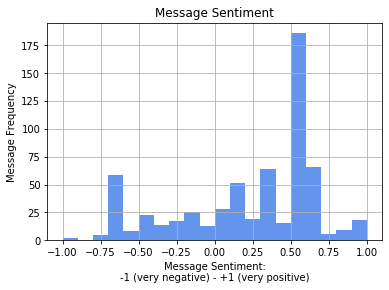

In [284]:
sentiment_df.hist(bins = 20, color ="cornflowerblue")
plt.xlabel('Message Sentiment:\n-1 (very negative) - +1 (very positive)')
plt.ylabel('Message Frequency')
plt.title("Message Sentiment")

Text(0.5, 1.0, 'Message Subjectivity')

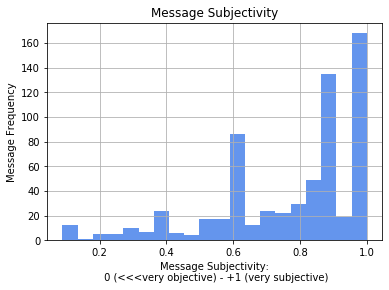

In [285]:
subj_df.hist(bins = 20, color = "cornflowerblue", histtype = "bar")
plt.xlabel('Message Subjectivity:\n 0 (<<<very objective) - +1 (very subjective)')
plt.ylabel('Message Frequency')
plt.title("Message Subjectivity")

Next we check if sentiment or subjectivity is able to predict the number of likes that a message receives:

In [311]:
#regression = sm.ols(formula="Likes ~ polarity + subjectivity + Age + Gender", data=food_buzz).fit()
#print(regression.summary())

Both, message sentiment (b = .08, p = .001) and message subjectivity (b = .07, p = .007) emerged as small, positive predictors of message liking. 

# LIWC

Lets dive a little deeper into the data and see how it might differ. For this we use the tool LWIC2015 with a Dutch dictionary. We are analysis the categories: affect, cognitive processes, epreption, biological needs, positive emotion, negative emotion within the data.

In [287]:
#lwic = pd.read_csv("Output/food_buzz_topics.csv", engine = "python", encoding='utf-8', decimal = ",")

#Lets load an anonymized versiob of this dataset:

lwic = pd.read_csv(("Output/liwc_anon.csv"))

In [313]:
lwic[:5]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Sender,Child,UMID,Recipient,Type,...,Dash,Quote,Apostro,Parenth,OtherP,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,broad_filter_clean
0,0,0,0,0,76,3410302338,2338.0,32022,NaN,group,...,0.0,0.0,0.0,0.0,0.0,0,21.0,0.3156,"kaas, besselink, romy, hesselink, ronnie, zeg,...","['ham', 'kaas', 'tosti']"
1,1,1,1,1,82,3410302338,2338.0,32092,NaN,group,...,0.0,0.0,0.0,0.0,0.0,1,21.0,0.2909,"kaas, besselink, romy, hesselink, ronnie, zeg,...","['ham', 'kaas', 'tosti', 'like']"
2,2,2,2,2,163,3410302341,2341.0,31332,NaN,group,...,0.0,0.0,0.0,0.0,0.0,2,30.0,0.5091,"honger, stuur, doe, klaar, gegeten, zitten, kl...",['honger']
3,3,3,3,3,238,3410302342,2342.0,31681,NaN,group,...,0.0,0.0,0.0,0.0,0.0,3,37.0,0.0211,"eet, taart, stukje, poepen, opeten, zei, mond,...","['kort', 'pittig']"
4,4,4,4,4,242,3410302342,2342.0,31691,NaN,group,...,0.0,0.0,0.0,0.0,0.0,4,37.0,0.0211,"eet, taart, stukje, poepen, opeten, zei, mond,...",['snoep']


We filter out the relevant LIWC variables for our analysis (affect, drives, social-, cognitive-, perceptual-, and biological processes), as well as removing zero-scores:

In [289]:
affect1 = list(lwic["affect"])
social1 = list(lwic["social"])
cogproc1 = list(lwic["cogproc"])
percept1 = list(lwic["percept"])
bio1 = list(lwic["bio"])
drives1 = list(lwic["drives"])

affect =  [x for x in affect1 if x != 0]
social =  [x for x in social1 if x != 0]
cogproc =  [x for x in cogproc1 if x != 0]
percept =  [x for x in percept1 if x != 0]
drives =  [x for x in drives1 if x != 0]
bio =  [x for x in bio1 if x != 0]

print("We have", len(affect), "affect scores.")
print("We have", len(social), "scores for social processes")
print("We have", len(cogproc), "scores for cognitive processes")
print("We have", len(percept), "scores for perceptional processes.")
print("We have", len(drives), "scores for drives.")
print("We have", len(bio), "scores for biological processes.")




We have 461 affect scores.
We have 807 scores for social processes
We have 755 scores for cognitive processes
We have 365 scores for perceptional processes.
We have 376 scores for drives.
We have 1592 scores for biological processes.


In [290]:
lwic = lwic.rename(columns={'Likes_x': 'Likes'})

Finally we can run some correlations and regression analyses between the LIWC scores and our main outcome variables, message healthiness and message likes:

In [293]:
print("The correlation between message affect and message healthiness is:",lwic["affect"].corr(lwic["nutriscore_mean"]))
print("p = ", lwic["affect"].corr(lwic["nutriscore_mean"], method = pearsonr_pval))

      
print("The correlation between social processes and message healthiness is:",lwic["social"].corr(lwic["nutriscore_mean"]))
print("p = ",lwic["social"].corr(lwic["nutriscore_mean"], method = pearsonr_pval))

print("The correlation between cognitive processes and message healthiness is:",lwic["cogproc"].corr(lwic["nutriscore_mean"]))     
print("p = ",lwic["cogproc"].corr(lwic["nutriscore_mean"], method = pearsonr_pval))

print("The correlation between perceptive processes and message healthiness is:",lwic["percept"].corr(lwic["nutriscore_mean"]))     
print("p = ",lwic["percept"].corr(lwic["nutriscore_mean"], method = pearsonr_pval))

print("The correlation between biological processes and message healthiness is:",lwic["bio"].corr(lwic["nutriscore_mean"]))      
print("p = ",lwic["bio"].corr(lwic["nutriscore_mean"], method = pearsonr_pval))

print("The correlation between drives and message healthiness is:",lwic["drives"].corr(lwic["nutriscore_mean"]))
print("p = ",lwic["bio"].corr(lwic["nutriscore_mean"], method = pearsonr_pval))


The correlation between message affect and message healthiness is: -0.06715614926259605
p =  0.04317655266683583
The correlation between social processes and message healthiness is: -0.042913324167371904
p =  0.1966311659524439
The correlation between cognitive processes and message healthiness is: -0.005654155879118835
p =  0.8649711440071112
The correlation between perceptive processes and message healthiness is: -0.035873518600610776
p =  0.2804806708085297
The correlation between biological processes and message healthiness is: -0.027191977465730283
p =  0.4133871733641075
The correlation between drives and message healthiness is: 0.023809846725211966
p =  0.4133871733641075


Next we analyse if any of the LIWC variables on its own an predict the number of likes that a message recceives.

In [309]:
regression = sm.ols(formula="Likes ~ affect + social + bio + cogproc + percept + drives + Age + Gender", data=lwic).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Likes   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.339
Date:                Fri, 18 Nov 2022   Prob (F-statistic):             0.0168
Time:                        13:28:02   Log-Likelihood:                -2341.9
No. Observations:                2138   AIC:                             4702.
Df Residuals:                    2129   BIC:                             4753.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1700      0.185      0.917      0.3

None of the LIWC variables predicts the nummber of likes that a given message receives.

# LDA topic modelling

Now lets see if the messages might cluster into different text topics. For this we will run a topic modelling analysis:

In [314]:
import pattern
from pattern.nl import lemma, lexeme
from pattern.nl import parse
from pattern.nl import pprint
from pattern.nl import split

This type of analysis requires its own kind of preprocessing. E.g. detecting and transormation of n_grams within the text:

In [158]:
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [159]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

Sometimes it is also helpful to filter words according to their grammatical role in a sentence. For this we will use lemmatization. Lets see an example: (idk why but the cell below has to be run multiple times before it will work).

In [169]:
pprint(parse('Ik ben gisteren naar de doctor gegaaaaan', relations=True, lemmata=True))

          WORD   TAG    CHUNK   ROLE   ID     PNP    LEMMA       
                                                                 
            Ik   PRP    NP      SBJ    1      -      ik          
           ben   MD     VP      -      1      -      zijn        
      gisteren   RB     ADVP    -      -      -      gisteren    
          naar   IN     PP      -      -      PNP    naar        
            de   DT     NP      -      -      PNP    de          
        doctor   NN     NP ^    -      -      PNP    doctor      
     gegaaaaan   NN     NP ^    -      -      PNP    gegaaaaan   


For the analysis lets lemmatize the the text:

In [170]:
#food_buzz["punct_string"] = [', '.join(map(str, l)) for l in food_buzz['punctuation']]
#food_buzz['lemma'] = food_buzz['punct_string'].apply(parse)
#unique_buzz["lemma"] = unique_buzz['stem_string'].apply(parse)

Now we will count how many times a lemma appears in the dataframe. Our goal is only to keep lemma which appear at least 2 times (indicating a real word). One-time items might skew the topic modelling results.

In [315]:
#tokens_stem = []
#for sentences in food_buzz.stem:
    #for words in sentences:
        #tokens_stem.append(words)
        
##tokens_punct = []
#for sentences in food_buzz.punctuation:
    #for words in sentences:
       # tokens_punct.append(words)
        
#tokens_lemma = []
#for sentences in food_buzz.lemma:
    #for words in sentences:
        #tokens_lemma.append(words)

#tokens_lemma2 = []
#for sentences in unique_buzz.lemma:
    #for words in sentences:
        #tokens_lemma2.append(words)

#c = Counter(tokens_stem)
##cc = Counter(tokens_punct)
#ccc = Counter(tokens_lemma)
#cccc = Counter(tokens_lemma2)


#d = dict((k, v) for k, v in c.items() if v <= 1)
#d = list(d.keys())

#dd = dict((k, v) for k, v in cc.items() if v <= 1)
#dd = list(dd.keys())

#ddd = dict((k, v) for k, v in ccc.items() if v <= 1)
#ddd = list(ddd.keys())

#dddd = dict((k, v) for k, v in cccc.items() if v <= 1)
#dddd = list(dddd.keys())


Lets filter out these one-time lemmas:

In [316]:
#food_buzz['stem2'] = food_buzz['stem'].apply(lambda x: [item for item in x if item not in d])
#food_buzz['punctuation2'] = food_buzz['punctuation'].apply(lambda x: [item for item in x if item not in dd or my_stop])
#food_buzz['lemma2'] = food_buzz['lemma'].apply(lambda x: [item for item in x if item not in ddd or my_stop])

Sometimes topics can become clearer if only certain words from the message are used. Two strategies will be tested (one tight and one more broad). THe first strategy will keep only the noun of the message. The second strategy will keep noun, verb, adverb and adjective.

In [377]:
def noun_filter(text):
    for sentence in split(text):
        l = []
        for w in sentence.words:
            if w.type.startswith('NN')and w.string:
                l.append(w.string)
        return(l)
    

def broad_filter(text):
    for sentence in split(text):
        l = []
        for w in sentence.words:
            if w.type.startswith('NN') or w.type.startswith('JJ') or w.type.startswith('VB') and w.string:
                l.append(w.string)
        return(l)
    

def broad_filter2(text):
    for sentence in split(text):
        l = []
        for w in sentence.words:
            if w.type.startswith('NN') or w.type.startswith('JJ')and w.string:
                l.append(w.string)
        return(l)

Lets apply those functions. And lets filter out stop words.

In [378]:
#food_buzz['noun_filter'] = food_buzz['lemma'].apply(noun_filter)
#food_buzz['broad_filter'] = food_buzz['lemma'].apply(broad_filter)
#food_buzz['broad_filter2'] = food_buzz['lemma'].apply(broad_filter2)
#unique_buzz["broad_filter"] = unique_buzz["lemma"].apply(broad_filter)

##tokens_broad = []
#for sentences in food_buzz.broad_filter:
 #   for words in sentences:
  #      tokens_broad.append(words)

#cccc = Counter(tokens_broad)


#dddd = dict((k, v) for k, v in cccc.items() if v <= 1)
#dddd = list(dddd.keys())

#food_buzz['broad_filter_clean']= food_buzz['broad_filter'].apply(lambda x: [item for item in x if item not in my_stop])
#food_buzz['broad_filter2']= food_buzz['broad_filter2'].apply(lambda x: [item for item in x if item not in dddd])

#food_buzz["n_grams_stems"] = make_n_grams(food_buzz["stem"])
#food_buzz["n_grams_nouns"] = make_n_grams(food_buzz["noun_filter"])
#food_buzz["n_grams_filter"] = make_n_grams(food_buzz["broad_filter2"])

After all the filtering: lets see how long our average message is by now:

In [177]:
#food_buzz['length'] = food_buzz['broad_filter2'].apply(len)

#print("Max number of token:", np.max(food_buzz.length))
#print("Mean number of token:", round(np.mean(food_buzz.length),2))
#print("Std of token:", round(np.std(food_buzz.length),2))

Max number of token: 64
Mean number of token: 3.03
Std of token: 4.58


# Training of the topic model

Nice: lets train some different topic models and see which performs the best. First of all we need to prepare our data and apply our different filters:

In [379]:
# Input format for the model : list of strings (list of tokens)
#docs_broad2 = food_buzz["broad_filter2"].tolist()
#docs_ngram = food_buzz["n_grams_filter"].tolist()
#docs_broad = food_buzz["broad_filter_clean"].tolist()
#docs_noun = food_buzz["noun_filter"].tolist()
#docs_all = unique_buzz["broad_filter"].tolist()
#docs_all = [x for x in docs_all if x is not None]
#vocab_broad2 = set(x for doc in docs_broad2 for x in doc)
#vocab_ngram = set(x for doc in docs_ngram for x in doc)
#vocab_broad = set(x for doc in docs_broad for x in doc)
#vocab_noun = set(x for doc in docs_noun for x in doc)
#vocab_all = set(x for doc in docs_all for x in doc)
#n_terms1 = len(vocab1)
#n_terms_broad2= len(vocab_broad2)
#n_terms_broad = len(vocab_broad)
#n_terms_noun = len(vocab_noun)
#n_terms_all = len(vocab_all)

#tdidf representations:
##tfidf = models.TfidfModel(corpus)
#corpus_tfidf = tfidf[corpus]
#texts = docs_broad

#print("Voc size:", n_terms_broad)
#print("Number of documents:", len(docs_broad))

In [380]:
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Create a BOW represenation of the texts
#id2word = corpora.Dictionary(docs_broad)
#corpus =[id2word.doc2bow(text) for text in docs_broad]

#corpus_all =[id2word.doc2bow(text) for text in docs_all]
#id2word_all = corpora.Dictionary(docs_all)

Next we run a coherencce analysis: This will give us an indication about what number of topics is ideal for the given dataset.

In [323]:
from gensim.models.ldamulticore import LdaMulticore

def calc_coherence_values(dictionary, corpus, texts, limit = 12, start = 1, step = 1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus_tfidf,id2word = dictionary, num_topics = num_topics, alpha=0.1, eta=0.1, random_state = 42)
        model_list.append(model)
        print('model created')
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#model_list, coherence_values = calc_coherence_values(dictionary = id2word, corpus = corpus, texts = texts, start = 25, limit = 60, step = 5)

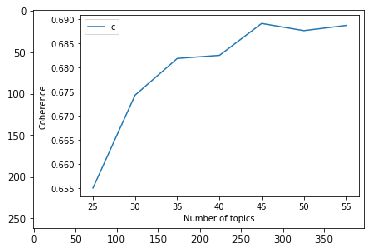

In [342]:
#limit, start, step = 60, 25, 5
#x = range(start, limit, step)
#plt.plot(x, coherence_values)
#plt.xlabel("Number of topics")
#plt.ylabel("Coherence")
#plt.legend(("coherence_values"), loc='best')
#plt.show()

img = iio.imread("Output/coherence.png")
plt.imshow(img)

The coherencce analysis suggests that 45 topics is ideal for the given data, but that a higher nummber of topics does not hurt topic coherencce. Lets explore the results of our different models when setting the number of topics to slightly varying parameters. This way we aim to find the best fitting model.

In [222]:
#lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=45,
#alpha="auto", eta="auto")

#lda_model2 = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=50,
#alpha="auto", eta="auto")

#lda_model3 = models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=55,
#alpha="auto", eta="auto")

#create a tf-idf representation
#tfidf = models.TfidfModel(corpus)

# use that tfidf-representation instead of the pure counts
#lda_tfidf4 = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=id2word, num_topics=40, alpha="auto", eta = "auto", random_state = 42)
#lda_tfidf5 = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=id2word, num_topics=45, alpha="auto", eta = "auto", random_state = 42)
#lda_tfidf6 = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=id2word, num_topics=50, alpha="auto", eta = "auto", random_state = 42)
#lda_tfidf7 = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=id2word, num_topics=55, alpha="auto", eta = "auto", random_state = 42)

In [366]:
#scoresperdoc=lda_tfidf6.inference(corpus_tfidf)
#with open("topicscores_tdif3.tsv","w",encoding="utf-8") as fo:
    #for row in scoresperdoc[0]:
        #fo.write("\t".join(["{:0.3f}".format(score) for score in row]))
        #fo.write("\n")
        


Lets explore our topics in the different models and see which one in most coherent for analysis:

In [367]:
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this

#vis_data = pyLDAvis.gensim.prepare(lda_tfidf6 ,corpus_tfidf ,id2word, mds='mmds')
#pyLDAvis.display(vis_data)


After exploration of the data we found that the TDIDF representation with 50 topics yielded the ost interpretable results.Therefore we continued with this model. Subsequently we calcculated to which "topic" each single message belonged to the most. For this we considered the 10 most dominant topics found by the model. Other topics were coded as residual.

In [382]:
#def format_topics_sentences(ldamodel=lda_tfidf6, corpus=corpus_tfidf, texts=docs_broad):
    # Init output
    #sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #for i, row in enumerate(ldamodel[corpus]):
        #row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        #for j, (topic_num, prop_topic) in enumerate(row):
            #if j == 0:  # => dominant topic
                #wp = ldamodel.show_topic(topic_num)
                #topic_keywords = ", ".join([word for word, prop in wp])
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            #else:
                #break
    #sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    #return(sent_topics_df)


#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_tfidf6, corpus=corpus_tfidf, texts=docs_broad)

# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'broad_filter_clean']

# Show
#df_dominant_topic.head(10)

We combine the topic scores with the rest of the dataset and save the results:

In [383]:
#food_buzz_topics = pd.concat([food_buzz_lwic, df_dominant_topic], axis = 1)
#food_buzz_topics.to_csv(r'Output/food_buzz_topics.csv', encoding='utf-8')

Out of the data 12 dominant topics emerge. They are saved into seperate dataframes:

In [372]:
#t1 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 1.0]
#t2 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 2.0]
#t3 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 3.0]
#t4 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 4.0]
#t5 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 5.0]
#t6 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 6.0]
#t7 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 7.0]
#t8 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 8.0]
#t9 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 9.0]
#t10 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 10.0]
#t11 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 11.0]
#t12 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 12.0]
#t45 = df_dominant_topic[df_dominant_topic.Dominant_Topic == 45.0]

Also we create dummies, if a given message belongs to a topic or not:

In [373]:
#result = pd.concat([food_buzz_topics, pd.get_dummies(food_buzz_topics['Dominant_Topic'], prefix = "topic")], axis=1)
#result2 = result.rename(columns={'topic_1.0': 'topic_100', 'topic_2.0': 'topic_12', 'topic_3.0': 'topic_6', 'topic_4.0': 'topic_101', 'topic_5.0': 'topic_102', 'topic_6.0': 'topic_103', 'topic_7.0': 'topic_150', 'topic_8.0': 'topic_104', 'topic_9.0': 'topic_105', 'topic_10.0': 'topic_106', 'topic_11.0': 'topic_107', 'topic_12.0': 'topic_108', 'topic_13.0': 'topic_109', 'topic_14.0': 'topic_110', 'topic_15.0': 'topic_111','topic_16.0': 'topic_112','topic_17.0': 'topic_113','topic_18.0': 'topic_13','topic_19.0': 'topic_114','topic_20.0': 'topic_115','topic_21.0': 'topic_9','topic_22.0': 'topic_5','topic_23.0': 'topic_10','topic_24.0': 'topic_116','topic_25.0': 'topic_117','topic_26.0': 'topic_11','topic_27.0': 'topic_118','topic_28.0': 'topic_119','topic_29.0': 'topic_120','topic_30.0': 'topic_4','topic_31.0': 'topic_121','topic_32.0': 'topic_7','topic_33.0': 'topic_122','topic_34.0': 'topic_123','topic_35.0': 'topic_8','topic_36.0': 'topic_2','topic_37.0': 'topic_1','topic_38.0': 'topic_124','topic_39.0': 'topic_125','topic_40.0': 'topic_126','topic_41.0': 'topic_127','topic_42.0': 'topic_3','topic_43.0': 'topic_128','topic_44.0': 'topic_129','topic_45.0': 'topic_130','topic_46.0': 'topic_131','topic_47.0': 'topic_132','topic_48.0': 'topic_133','topic_49.0': 'topic_134'})

Lets define and name the 12 most prevalent topics according what best fits their content:

In [374]:
best_topics = ['1: Eten',
               '2: Wat eet ik: Foods',
               '3: Eet smakelijk',
               '4: Honger',
               '5: Drink / Mjamm',
               '6: Eating plans / Tafel',
               '7: Dutch meals',
               '8: Food, ijs, diverse',
               '9: Diverse / long',
               '10: Diverse / long2',
               '11: Diverse / long 3', 
               'Other']

In [157]:
print("We are left with", len(top_topics), "within the 12 most common topics")

We are left with 2124 within the 12 most common topics


Now we can try some visualization fo the discovered topics. First lets see how the topics are distributed:

In [348]:
#fig = px.pie(top_topics, names='Topic',  title='Topics', color_discrete_sequence=px.colors.sequential.Burg)
#fig.show()

Finally, let explore if any of the topics is able to predict the number of Likes that a message receives:

In [349]:
#regression = sm.ols(formula="Likes ~ Age + Gender + topic_1 + topic_2 + topic_3 + topic_4 + topic_5 + topic_6 + topic_7 + topic_8 + topic_9 + topic_10 + topic_11 + topic_12 + topic_13", data=result2).fit()
#print(regression.summary())

None of the topics predicted the number of likes that a message received.

# Exploratory analysis

As an exxploratory analysis we analyzed if other variables related to message content and style might predicct message liking.

In [387]:
#regression = sm.ols(formula="Likes ~ Age + Gender + length + Media_1 + Media_2 + nutriscore_mean + polarity + subjectivity + affect + bio + drive + percept + social + cog + topic_1 + topic_2 + topic_3 + topic_4 + topic_5 + topic_6 + topic_7 + topic_8 + topic_9 + topic_10 + topic_11 + topic_12 + Media_1 + Media_2 + Media_0", data=food_buzz).fit()
#print(regression.summary())

As before message sentiment and subjetivity remained (marginally) significcant predictors of message liking. Message containing any image (b = 0.36, p = <0.001) and message containing a diet-related image emerged as overall strongest predictors of mmessage liking (b = 0.12, p = <0.001)